Old Documentation:

- [`import`](https://docs.python.org/3/reference/simple_stmts.html#the-import-statement)
- [`module`](https://docs.python.org/3/tutorial/modules.html)
- [`numpy`](https://numpy.org/doc/1.19/user/whatisnumpy.html)
- [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)
- [`numpy.save`](https://numpy.org/doc/stable/reference/generated/numpy.save.html)

New Documentation:

- [`ffmpeg`](https://ffmpeg.org/ffmpeg.html#Description)
- [`scipy`](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
- [`scipy.io`](https://docs.scipy.org/doc/scipy/reference/io.html)
- [`scipy.io.wavfile.read`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html)
- [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html)
- [`scipy.signal.spectrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html)
- [`matplotlib`](https://matplotlib.org/3.3.3/index.html)
- [`matplotlib.pyplot`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)
- [`matplotlib.pyplot.pcolormesh`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html)
- [`matplotlib.pyplot.ylabel`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.ylabel.html)
- [`matplotlib.pyplot.xlabel`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html)
- [`matplotlib.pyplot.show`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.show.html)
- [`matplotlib.pyplot.figure`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html) (also see [rcParams["figure.figsize"]](https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html?highlight=figure.figsize#a-sample-matplotlibrc-file))
- [`numpy.log`](https://numpy.org/doc/stable/reference/generated/numpy.log.html)

Import matplotlib for visualizations; numpy for data handling; and scipy for spectrogram creation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

Confirm you have ffmpeg on your system by printing the version. This will be used for mp4 to wav conversion.

In [2]:
!ffmpeg -hide_banner -version 

ffmpeg version 4.3.1-4ubuntu1 Copyright (c) 2000-2020 the FFmpeg developers
built with gcc 10 (Ubuntu 10.2.0-9ubuntu2)
configuration: --prefix=/usr --extra-version=4ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab

Convert recording 1 from m4a to wav.

In [3]:
!ffmpeg -hide_banner -y -i ./samples/examples/conversion/recording-1.m4a ./samples/examples/conversion/recording-1.wav

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from './samples/examples/conversion/recording-1.m4a':
  Metadata:
    major_brand     : M4A 
    minor_version   : 0
    compatible_brands: M4A mp42isom
    creation_time   : 2021-01-21T13:13:39.000000Z
    title           : sample-1
    compilation     : 0
    gapless_playback: 0
    encoder         : Music 1.1.2.28
    iTunSMPB        :  00000000 00000840 00000210 000000000005ADB0 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
    Encoding Params : vers
    iTunNORM        :  00000359 00000000 000009D0 00000000 000017DA 00000000 0000551E 00000000 000017C3 00000000
  Duration: 00:00:08.50, start: 0.047891, bitrate: 78 kb/s
    Stream #0:0(und): Audio: aac (LC) (mp4a / 0x6134706D), 44100 Hz, mono, fltp, 71 kb/s (default)
    Metadata:
      creation_time   : 2021-01-21T13:13:39.000000Z
Stream mapping:
  Stream #0:0 -> #0:0 (aac (native) -> pcm_s16le (native))
Press [q] to stop, [?] for help
Output #0, wav, to './samples/exampl

Compute the raw mel spectrogram of recording 1.

In [4]:
sample_rate, samples = wavfile.read('./samples/examples/conversion/recording-1.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

Visualize the raw mel spectrogram of recording 1, given frequencies, times, and amplitude (spectrogram variable).

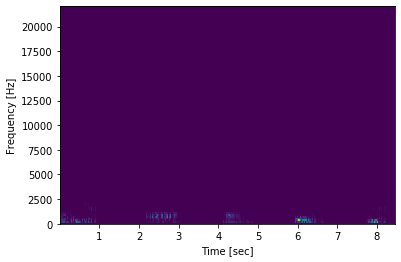

In [5]:
plt.pcolormesh(times, frequencies, spectrogram, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Visualize the raw mel spectrogram of recording 1 using only amplitude (spectrogram variable).

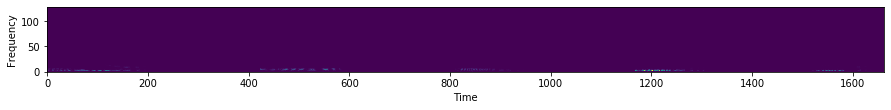

In [6]:
plt.rcParams["figure.figsize"] = (15,3)
plt.imshow(spectrogram, origin='lower')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

Save the raw mel spectrogram of recording 1 as an npy file.

In [7]:
np.save("./samples/examples/conversion/spectrogram.npy", spectrogram)

Calculate the log spectrogram using the raw spectrogram of recording 1.

In [8]:
log_spectrogram = np.log(spectrogram+0.0001)

Visualize the log mel spectrogram of recording 1, given frequencies, times, and amplitude (spectrogram variable).

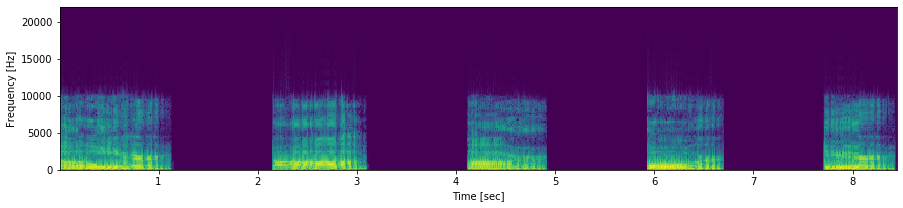

In [9]:
plt.pcolormesh(times, frequencies, log_spectrogram, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Visualize the log mel spectrogram of recording 1, given only amplitude (spectrogram variable).

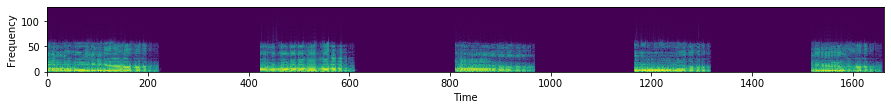

In [10]:
plt.rcParams["figure.figsize"] = (15,3)
plt.imshow(log_spectrogram, origin='lower')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

Save the log mel spectrogram of recording 1 as an npy file.

In [11]:
np.save("./samples/examples/conversion/log_spectrogram.npy", log_spectrogram)